##  Q1
We will model the data from “% of fouses having mud or unburnt brick as material of wall” from theprevious assignment based the file NDAP_REPORT_7004.csv. 

a. Examine Q-Q plots for Gaussian and uniform distributions, and visually assess which of the two is abetter fit. [2]

b. Find out MLE parameter estimates for Gaussian distribution. [1]

c. Find out MLE parameter estimates for uniform distribution. [1]

d. Between Gaussian and uniform with MLE parameters, determine the one that is more likely toexplain the observed data. [3]

Uploading data file 

In [71]:
# UPLOADING DATA FILE
from google.colab import files
upload = files.upload()

Saving NDAP_REPORT_7004.csv to NDAP_REPORT_7004 (2).csv


importing all required extensions

In [72]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab 
import statsmodels.api as sm
import math

Reading data into panda dataframe

In [73]:
df = pd.read_csv('NDAP_REPORT_7004.csv')
display(df)

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.4268,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,150,426.000000,95.00000,72.000000,185.000000,130.000000,39160.00000,1927.000000,5.000000
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,0,50.000000,2.00000,238.000000,5094.000000,0.000000,2.00000,5.000000,13.000000
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,1,6.000000,0.00000,165.000000,4820.000000,11.000000,147.00000,116.000000,2.000000
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,62,4939.000000,145.00000,113.000000,74.000000,96.000000,12642.00000,897.000000,12.000000


clearing some data from number of census houses column and creating a new column called data which contains all values of number of census houses column in percentage. 

In [74]:
df['Number of census houses'] = pd.to_numeric(df.replace({'Number of census houses' : {'zero':0}})['Number of census houses'])
df['data'] = (df['Houses having mud or unburnt brick as material of wall']/df['Number of census houses'])*100
df=df.fillna(0)                      #some values were NaN in data column so I filled them with 0
display(df)

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall,data
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465.00000,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000,20.746357
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522.00000,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000,20.306068
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657,8.384931
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136.00000,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000,7.117844
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.42680,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343,15.964869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352.00000,202,150,426.000000,95.00000,72.000000,185.000000,130.000000,39160.00000,1927.000000,5.000000,1.005856
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410.00000,6,0,50.000000,2.00000,238.000000,5094.000000,0.000000,2.00000,5.000000,13.000000,0.924214
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279.00000,11,1,6.000000,0.00000,165.000000,4820.000000,11.000000,147.00000,116.000000,2.000000,0.113658
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408.00000,16428,62,4939.000000,145.00000,113.000000,74.000000,96.000000,12642.00000,897.000000,12.000000,13.948825


Plotting Q-Q plot with respect to Gaussian distribution. 

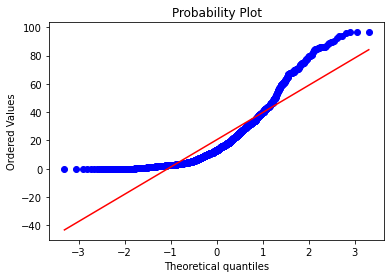

In [75]:
stats.probplot(df['data'], dist="norm", plot=plt)
plt.show()

Plotting Q-Q plot with respect to uniform distribution

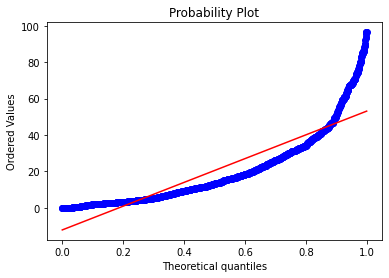

In [76]:
stats.probplot(df['data'], dist="uniform", plot=plt)
plt.show()

Here visually we can see that gaussian is better fit for given data.

(b)MLE parameters for uniform distribution

In [77]:
a=min(df['data'])
b=max(df['data'])
print(a)
print(b)

0.0
96.46082059155783


(c)MLE parameters for gaussian distribution

In [78]:
mu=df['data'].mean()
print(mu)
sigma=df['data'].std()
print(sigma)

20.453585218331156
20.988408081796997


(d)Log likelihood for uniform

In [79]:
sum=0
for i in range(len(df['data'])):
   sum += -math.log(b-a)
print(sum)   

-6730.338685620256


Log likelihood for Gaussian

In [80]:
logsum=0
df['newdata']=(df['data']-mu)/sigma
for i in range(len(df['data'])):
  y=df['newdata'][i]
  logsum += -math.log(sigma*(math.sqrt(2*math.pi)))-(0.5*y*y)
print(logsum)  

-6573.364695420616


Here We can observe that log likelihood is more for gaussian hence gaussian is more likely to explain observed data.

# Q2
Assume there is a new type of distribution called IQ (inverted quadratic) given by p(x) = 0.75 (1-x2) for |x| ≤ 1and p(x) = 0 for |x|>1.

a. Write a python function to generate Q-Q plot for input samples with respect to the IQ function anduse it for XXX. [3]

b. Introduce parameters into IQ to allow scaling and shifting (while maintaining an area of 1) and showthe derivation. [2]

c. Derive expressions for the MLE estimates, show the derivation, and write a python function thatreturns the MLE estimates of the parameters given a column of data. [2]

d. Write a python function to compute data log likelihood for the parameterized IQ function, and use itto compute the log likelihood of the data from Q1 for the MLE estimate parameters. [3]

For part (a) I have used tent function as p(x)

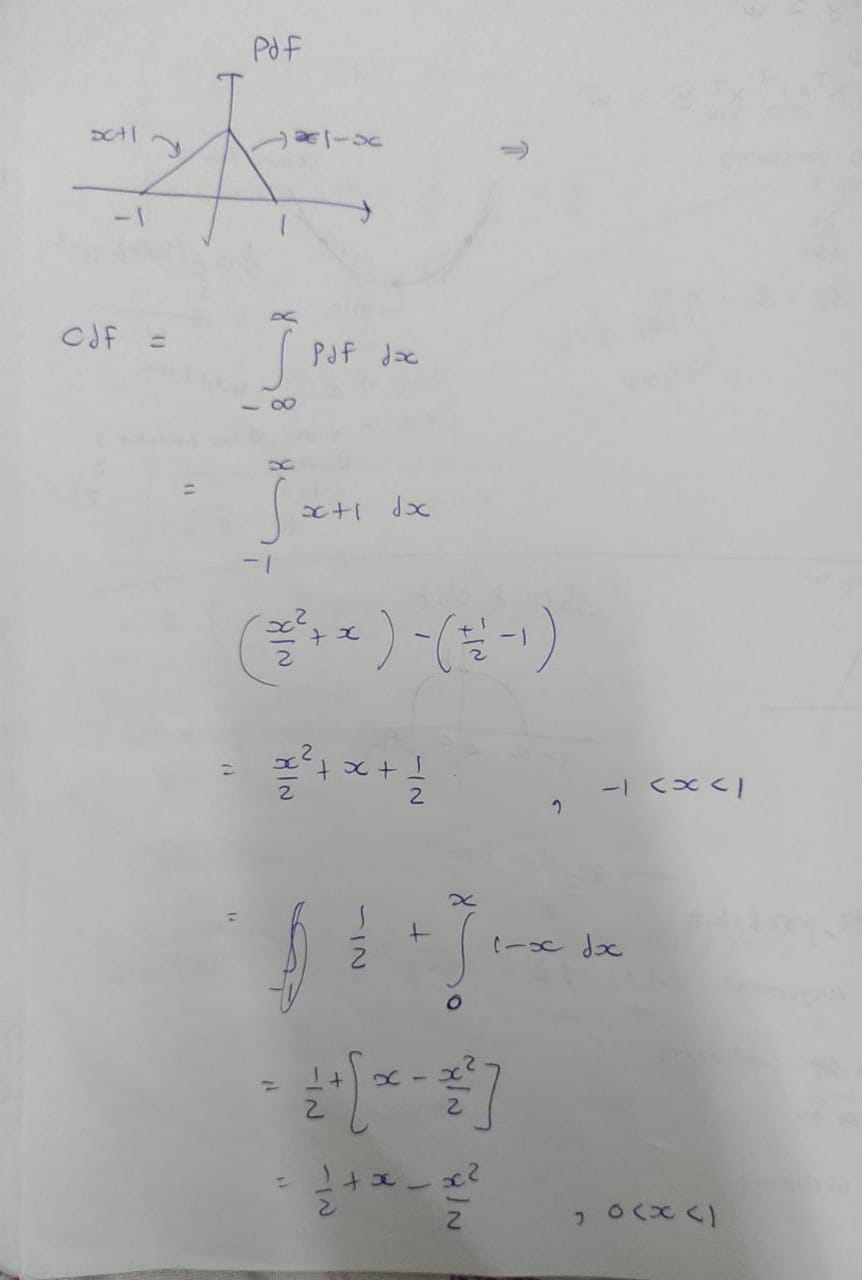

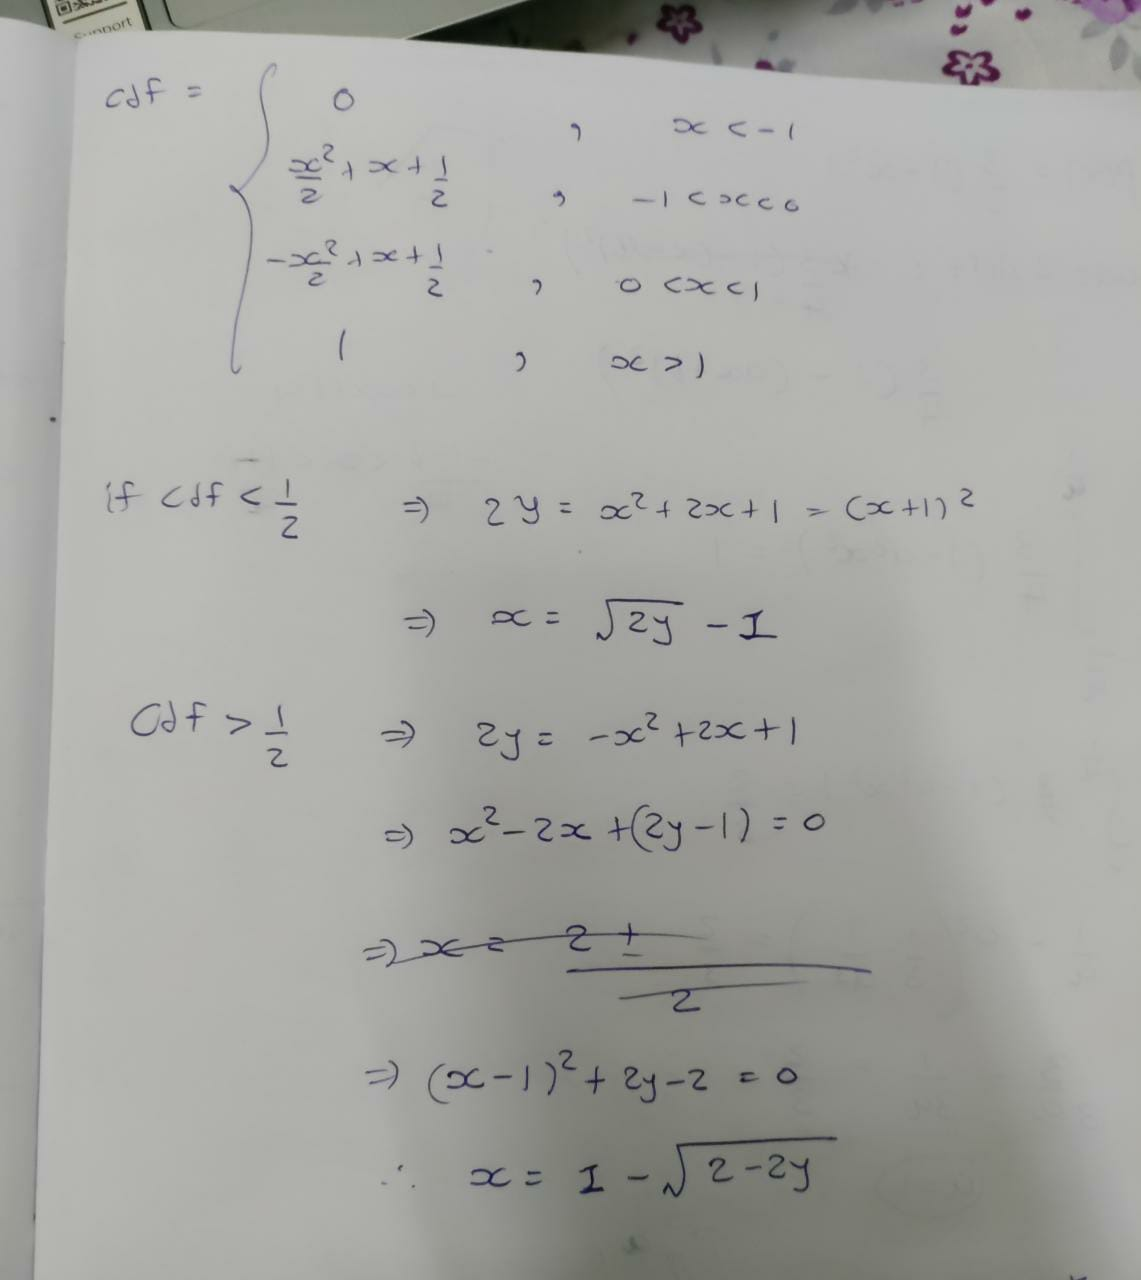

In [81]:
cdf=np.linspace(0.0,1.0,num=len(df['data']))
x=np.zeros(len(df['data']))
for i in range(len(df['data'])):
   if cdf[i] < 0.5 :
     x[i]=math.sqrt(2*cdf[i])-1
   else :
     x[i]=1-math.sqrt(2-(2*cdf[i]))  

sorting the data

In [82]:
y=np.array(df['data'])
y.sort()

Q-Q plot

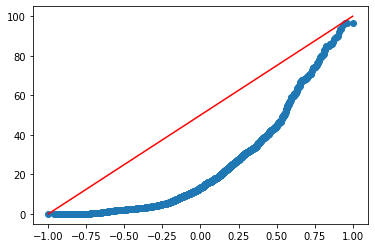

In [83]:
plt.scatter(x,y)
plt.plot([-1,1],[0,100],'r')

part (B) AND part (C) 

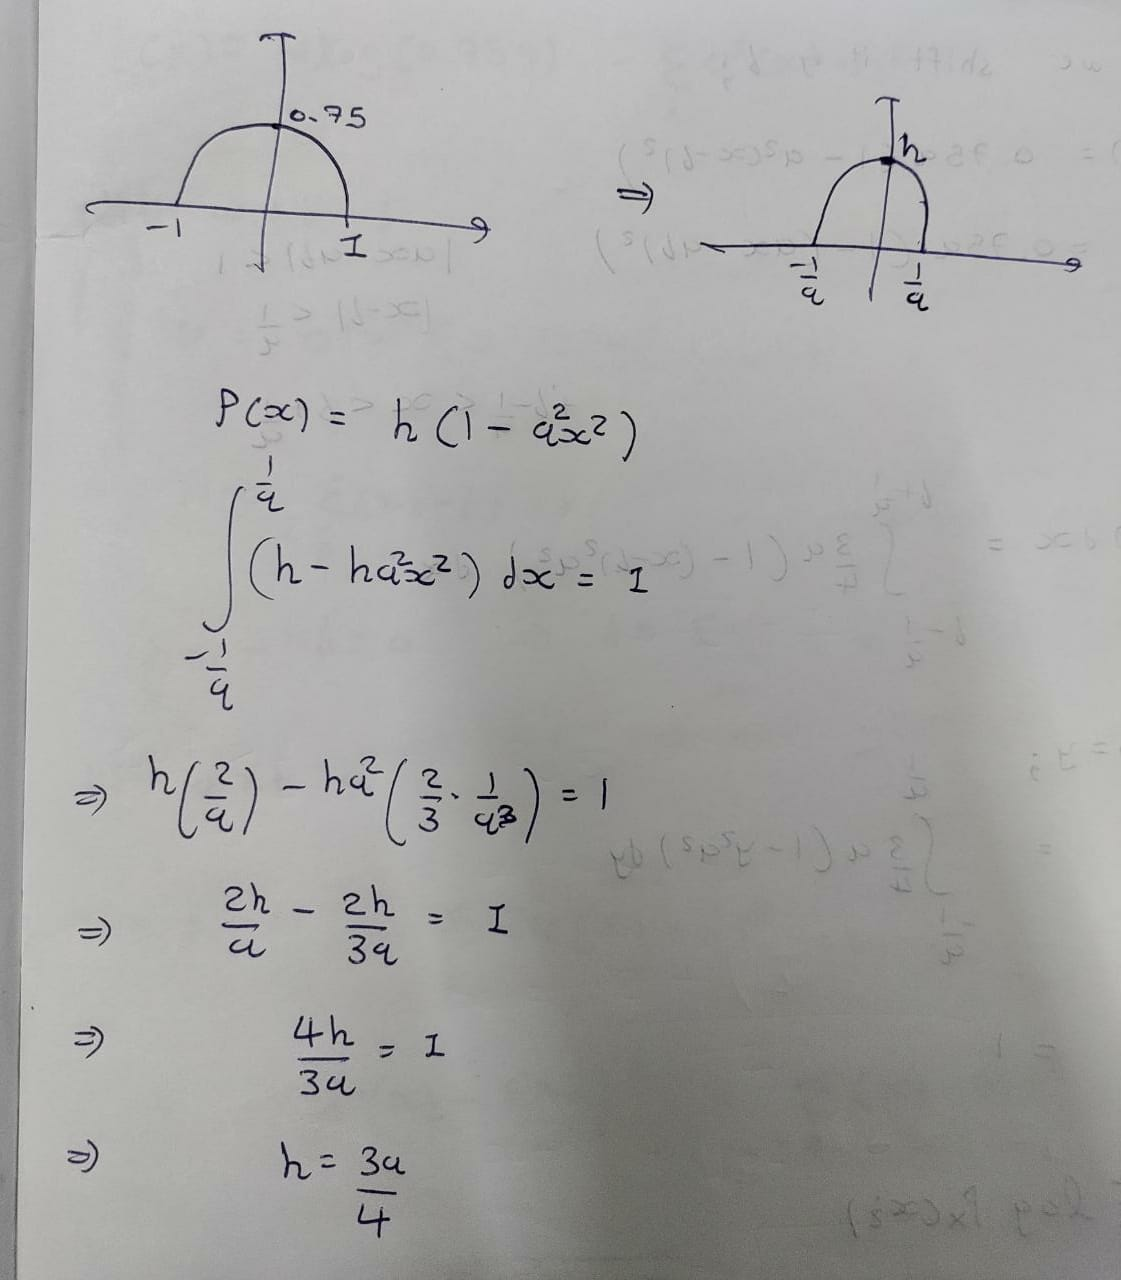

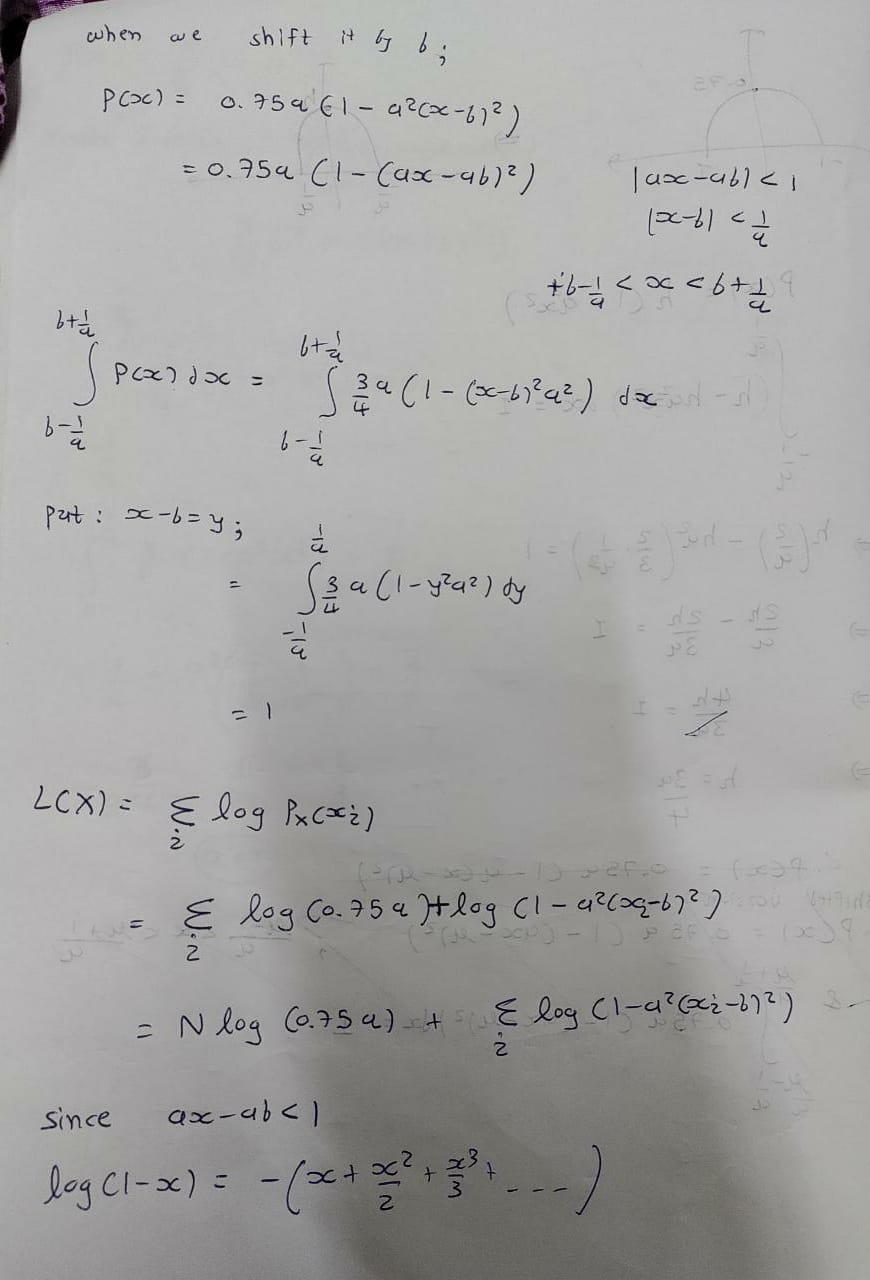

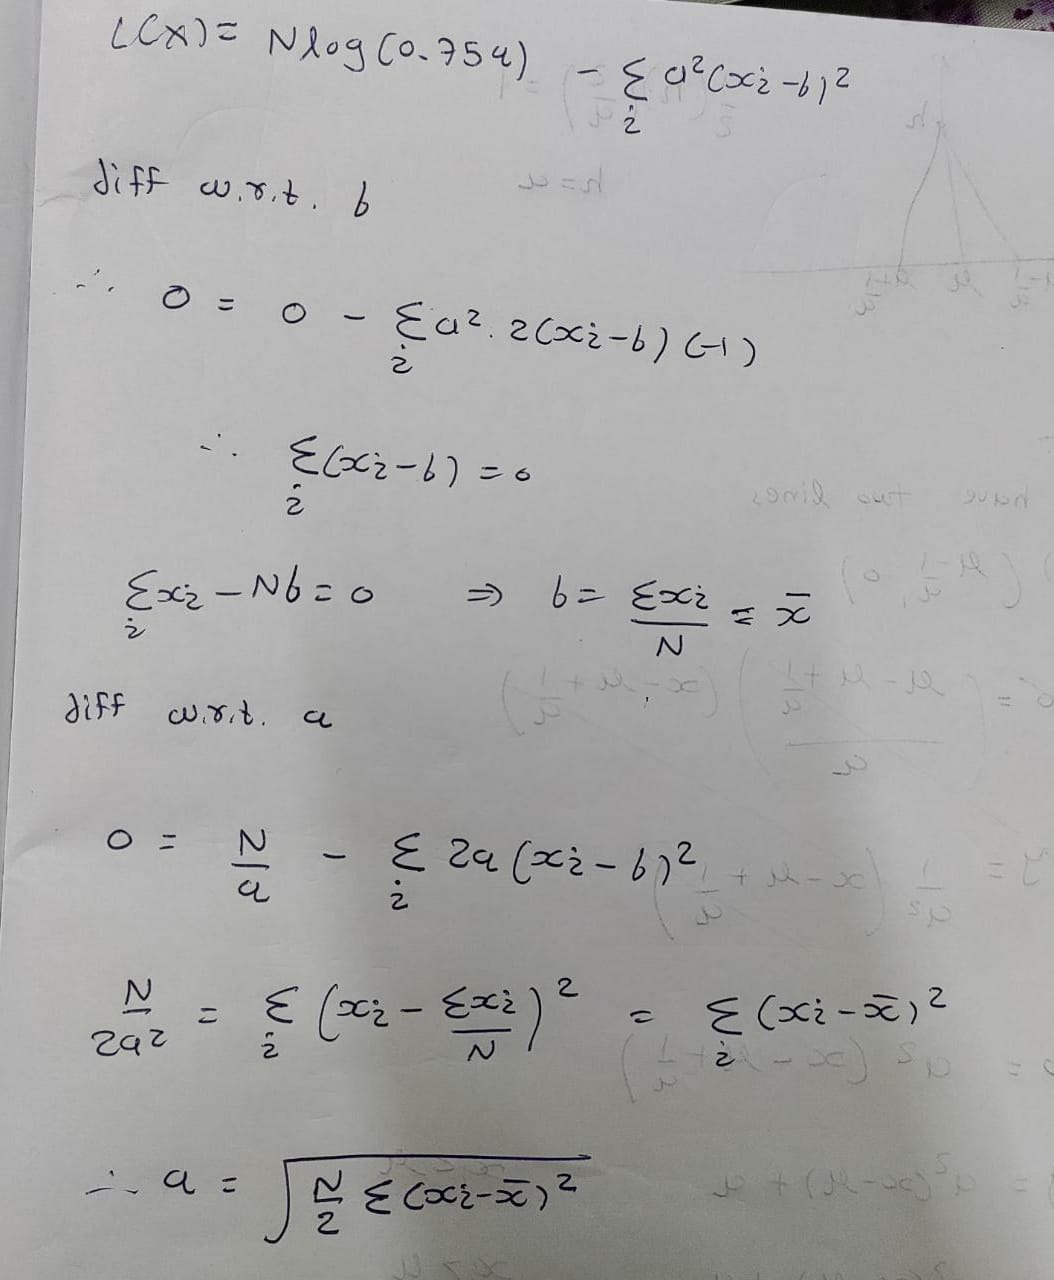

Calculating MLE parameters a and b

In [84]:
b=df['data'].mean()  #b is simply mean of the data
print(b)
sqsum=0
for i in range(len(df['data'])):
  r=df['data'][i]-b
  sqsum += r*r
a=math.sqrt((sqsum*len(df['data'])/2))
print(a)  

20.453585218331156
21853.43850534658


Calculating maximum log likelihood

In [85]:
lsum=0
for i in range(len(df['data'])):
  w=df['data'][i]-b1
  lsum += a*a*r*r
L= (len(df['data'])*math.log(0.75*a))-lsum 
print(L)

-180685128533957.3


#Q3
Determine the correct type of test for each of the following , state the reason for choosing that test, andperform the test using in-built functions in python libraries:

a. Determine if the percent of houses across districts with “mud or unburnt brick” is really larger forrural versus urban in the housing data. [2]

b. Determine if either rural or urban percent of houses with “mud or unburnt brick” for the samedistrict can be predicted using the other in the housing data. [2]

c. Determine if there is a relation between body style and drive wheels in the automobile data. [2]

(a) Here I have used Welch’s t-test. Since by comparing mean we can determine whether given data is larger for rural vs urban.

In [ ]:
# first I defined 2 arrays which will store data for rural and urban 
rural=np.array([])
urban=np.array([])

for i in range(len(df['data'])):
  if df['Type of residence namely rural or urban'][i] == 'Rural':
    rural=np.append(rural,df['data'][i])
  else :
    urban=np.append(urban,df['data'][i])

print(rural.mean())
print(urban.mean())

rural=np.append(rural,0) #To make length of both arrays same, I added 0 in rural array because rural array has 1 element less as compared to urban array
stats.ttest_ind(rural, urban, equal_var = False)


28.0768275238832
12.840686525133997
3.836112408213849


Ttest_indResult(statistic=14.908089872613292, pvalue=6.7091550611944636e-46)

Here we can see that p value is very small so null hypothesis is rejected. We can observe that mean of rural and urban differ significantly so we can conclude that % of houses in given data is higher for rural than in urban

(b) Here I have used pearson's correlation test to predict whether they are linearly related or not.

In [86]:
print(np.corrcoef(rural,urban))
#they have strong correlation

[[1.         0.60708955]
 [0.60708955 1.        ]]


Since we got correlation coefficient 0.6, they have strong correlation. So we can predict data for rural or urban if data from other one from same district is known.

(C) 

In [87]:
# UPLOADING DATA FILE
from google.colab import files
upload = files.upload()

Saving Automobile_data - Copy.csv to Automobile_data - Copy (1).csv


In [ ]:
df2 = pd.read_csv('Automobile_data - Copy.csv')
display(df2)

Here I have used chi-square test. Since both predictor and outcome are categorical.

In [90]:
from scipy.stats import chi2_contingency 
chi = pd.crosstab(df2['drive-wheels'], df2['body-style'], margins=True)
print(chi)
value = np.array([chi.iloc[0][0:5].values,
                  chi.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

body-style    convertible  hardtop  hatchback  sedan  wagon  All
drive-wheels                                                    
4wd                     0        0          2      3      4    9
fwd                     1        1         49     57     12  120
rwd                     5        7         19     36      9   76
All                     6        8         70     96     25  205
(9.253080065359477, 0.055075773689126195, 4)


Since p value is 0.055, we can reject null hypothesis and conclude that there is a relation between body style and drive wheels

# References


I learnt chi-square test from https://www.askpython.com/python/examples/chi-square-test#:~:text=Using%20scipy.&text=stats%20library%20which%20provides%20us,to%20implement%20Chi%2Dsquare%20test.&text=We%20make%20use%20of%20p,interpret%20the%20Chi%2Dsquare%20test.&text=If%20the%20p%2Dvalue%20is,no%20association%20between%20the%20variables.

While for most of the other things, I used knowledge gained in class and discussed some things with TA during class doubt session.